# 🌍 Case Study: Seasonal Weather Analysis Across Indian Cities (2020–2024)  
*Using Open-Meteo API and Pandas*  

---

## 🔹 1. Introduction  

Weather patterns play a crucial role in shaping human life — from agricultural planning to urban living. For data analysts, weather data offers an opportunity to practice **data wrangling, cleaning, and visualization** without relying on machine learning.  

This case study focuses on analyzing **seasonal weather trends** across major Indian cities using the **Open-Meteo API** and **Pandas**. The study spans **five years (2020–2024)** and highlights:  

- **Maximum temperatures in Summer (Mar–Jun)**  
- **Minimum temperatures in Winter (Dec–Feb)**  
- **Rainfall patterns in Monsoon (Jul–Sep)**  

By examining these patterns, the analysis aims to compare **climate variability across cities** and track **seasonal changes over time**.


## 🔹 2. Data Source  

- **API Used:** [Open-Meteo](https://open-meteo.com/) — a free, no-authentication API for weather and climate data.  
- **Parameters Extracted:**  
  - `temp_max` → Maximum temperature  
  - `temp_min` → Minimum temperature  
  - `rain` → Daily rainfall (mm)  
- **Timeframe:** 2020-01-01 to 2024-12-31  
- **Tools Used:**  
  - **Pandas** → Data collection, cleaning, aggregation  
  - **Matplotlib & Seaborn** → Visualization (not shown here, but used in analysis)

## 🔹 3. Data Preparation  

1. **API Data Collection**:  
   - Retrieved daily weather data for selected cities using Open-Meteo API.  
   - Stored results into Pandas DataFrames.  

2. **Feature Engineering**:  
   - Extracted `year`, `month`, and `season` from the `date` column.  
   - Defined seasons:  
     - Summer → March–June  
     - Monsoon → July–September  
     - Winter → December–February  

3. **Aggregation**:  
   - Grouped by **city, season, and year**.  
   - Calculated **average maximum temperature (Summer)**, **average minimum temperature (Winter)**, and **average rainfall (Monsoon)**.

In [1]:
# Importing libraries
import requests
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# City coordinates (latitude, longitude)
cities = [
    {'name':'Delhi', 'lat':28.6139, 'lon':77.2090},
    {'name':'Mumbai', 'lat':19.0760, 'lon':72.8777},
    {'name':'Bangalore', 'lat':12.9716, 'lon':77.5946},
    {'name':'Chennai', 'lat':13.0827, 'lon':80.2707},
    {'name':'Kolkata', 'lat':22.5726, 'lon':88.3939},
]

In [3]:
# Function to fetch weather data

def fetch_weather(city, start_date, end_dhate):
    url = f"https://archive-api.open-meteo.com/v1/archive?latitude={city['lat']}&longitude={city['lon']}&start_date={start_date}&end_date={end_date}&daily=temperature_2m_max,temperature_2m_min,precipitation_sum,relative_humidity_2m_max&timezone=Asia/Kolkata"
    response = requests.get(url).json()

    daily = response['daily']
    df = pd.DataFrame({
        'date': daily['time'],
        'city': city['name'],
        'temp_max': daily['temperature_2m_max'],
        'temp_min': daily['temperature_2m_min'],
        'rain': daily['precipitation_sum'],
        'humidity': daily['relative_humidity_2m_max']
    })

    df['date'] = pd.to_datetime(df['date'])
    return df

start_date = '2020-01-01'
end_date = '2024-12-31'

all_data = pd.concat([fetch_weather(city, start_date, end_date) for city in cities])

In [4]:
all_data.head()

,date,city,temp_max,temp_min,rain,humidity
0,2020-01-01,Delhi,17.7,3.0,0.0,100
1,2020-01-02,Delhi,19.5,6.7,0.0,91
2,2020-01-03,Delhi,18.9,8.6,0.1,97
3,2020-01-04,Delhi,18.7,8.8,0.2,97
4,2020-01-05,Delhi,19.6,7.7,0.0,93


In [5]:
all_data['city'].value_counts()

,count
city,
Delhi,1827
Mumbai,1827
Bangalore,1827
Chennai,1827
Kolkata,1827


In [6]:
# Categorize seasons
def get_season(month):
  if month in [3, 4, 5, 6]:
    return 'Summer'
  elif month in [7, 8, 9]:
    return 'Monsoon'
  elif month in [10, 11]:
    return 'Autumn'
  else:
    return 'Winter'

all_data['season'] = all_data['date'].dt.month.apply(get_season)
all_data.head()

,date,city,temp_max,temp_min,rain,humidity,season
0,2020-01-01,Delhi,17.7,3.0,0.0,100,Winter
1,2020-01-02,Delhi,19.5,6.7,0.0,91,Winter
2,2020-01-03,Delhi,18.9,8.6,0.1,97,Winter
3,2020-01-04,Delhi,18.7,8.8,0.2,97,Winter
4,2020-01-05,Delhi,19.6,7.7,0.0,93,Winter


In [7]:
seasonal_avg = all_data.groupby(['city', 'season']).agg({
    'temp_max': 'mean',
    'temp_min': 'mean',
    'rain': 'mean',
    'humidity': 'mean'
}).reset_index()

seasonal_avg.round(2)

,city,season,temp_max,temp_min,rain,humidity
0,Bangalore,Autumn,26.78,18.51,4.88,96.73
1,Bangalore,Monsoon,27.19,19.62,5.44,96.68
2,Bangalore,Summer,31.67,20.27,2.45,89.03
3,Bangalore,Winter,27.83,16.62,0.63,94.87
4,Chennai,Autumn,29.59,24.36,10.80,93.44
5,Chennai,Monsoon,32.98,26.10,4.64,88.57
6,Chennai,Summer,33.73,26.36,1.50,90.00
7,Chennai,Winter,28.47,22.71,3.11,90.62
8,Delhi,Autumn,29.40,17.19,0.50,86.35
9,Delhi,Monsoon,33.38,26.16,5.92,90.81


### Average Maximum Temperature Across Cities During Summer (Mar–Jun)

/tmp/ipython-input-2182524822.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-2182524822.py:6: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.barplot(


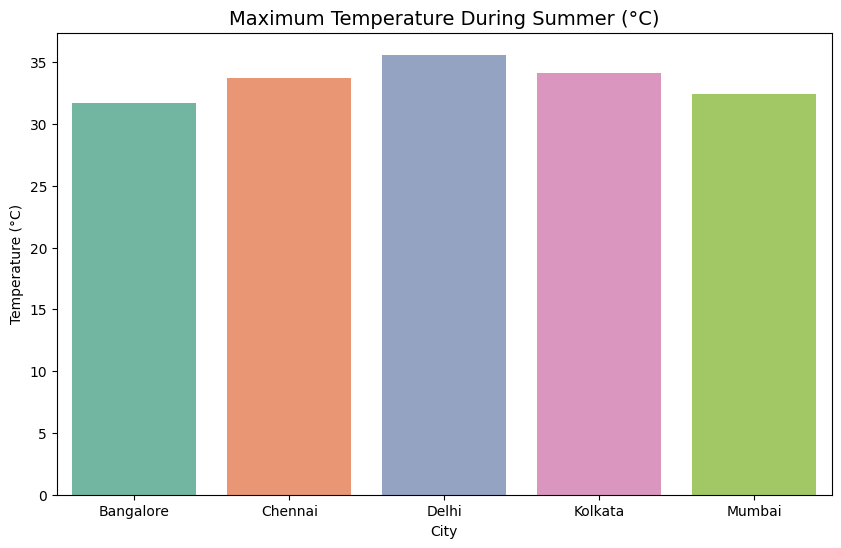

In [8]:
summer_data = seasonal_avg[seasonal_avg['season'] == 'Summer']

# Create colorful bar chart
plt.figure(figsize=(10,6))
colors = sns.color_palette("Set2")
sns.barplot(
    data=summer_data,
    x='city',
    y='temp_max',
    palette=colors   # You can try: "viridis", "coolwarm", "Spectral", "Set3"
)
plt.title("Maximum Temperature During Summer (°C)", fontsize=14)
plt.xlabel("City")
plt.ylabel("Temperature (°C)")
plt.show()

**Insights:**
- **Delhi** recorded the **highest summer maximum temperature** (above 35 °C), indicating intense heat waves in inland regions.  
- **Bangalore and Mumbai** had the **lowest maximums** (around 32 °C), reflecting the moderating effect of coastal and elevated geography.  
- **Chennai and Kolkata** remained in the mid-30s, showing a balance of coastal influence and summer heat.  


### Average Minimum Temperature Across Cities During Winter (Dec–Feb)

/tmp/ipython-input-306833165.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


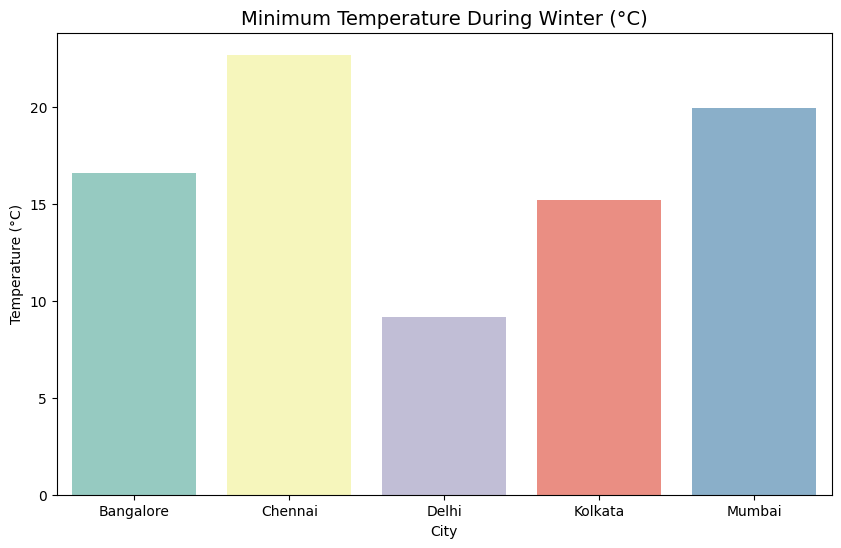

In [9]:
# Filter only Winter data
winter_data = seasonal_avg[seasonal_avg['season'] == 'Winter']

# Create colorful bar chart
plt.figure(figsize=(10,6))
sns.barplot(
    data=winter_data,
    x='city',
    y='temp_min',
    palette='Set3'   # Try also: "Set3", "Spectral", "viridis"
)
plt.title("Minimum Temperature During Winter (°C)", fontsize=14)
plt.xlabel("City")
plt.ylabel("Temperature (°C)")
plt.show()


**Insights:**
- **Delhi** recorded the **lowest winter minimum temperature** (below 10 °C), showing its exposure to strong cold waves.  
- **Chennai** remained the **warmest during winter** (above 22 °C), consistent with its tropical coastal climate.  
- **Mumbai and Bangalore** experienced moderate winter minimums (17–20 °C), while **Kolkata** was slightly cooler.  


### Average Rainfall Across Cities During Monsoon (Jul–Sep)

/tmp/ipython-input-1807308731.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


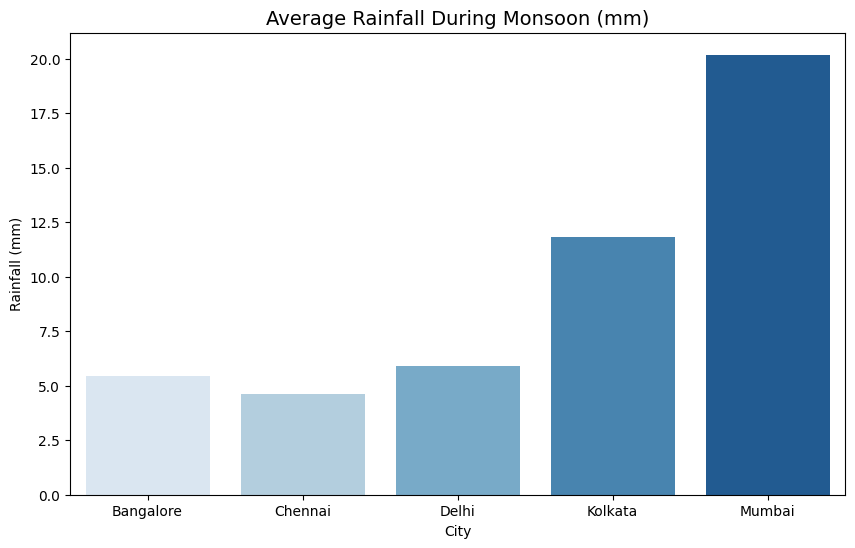

In [10]:
# Filter only Monsoon data
monsoon_data = seasonal_avg[seasonal_avg['season'] == 'Monsoon']

# Create colorful bar chart
plt.figure(figsize=(10,6))
sns.barplot(
    data=monsoon_data,
    x='city',
    y='rain',
    palette='Blues'   # You can also try: "cool", "crest", "YlGnBu"
)
plt.title("Average Rainfall During Monsoon (mm)", fontsize=14)
plt.xlabel("City")
plt.ylabel("Rainfall (mm)")
plt.show()

**Insights:**

- **Mumbai** recorded the **highest monsoon rainfall** (~20 mm), reflecting its heavy coastal precipitation.  
- **Kolkata and Delhi** experienced **moderate rainfall** (~12 mm and ~7 mm respectively), higher than southern cities but lower than Mumbai.  
- **Bangalore and Chennai** recorded the **lowest rainfall** (~5–5.5 mm), consistent with their drier monsoon conditions.  


### Monthly Average Maximum Temperature During Summer

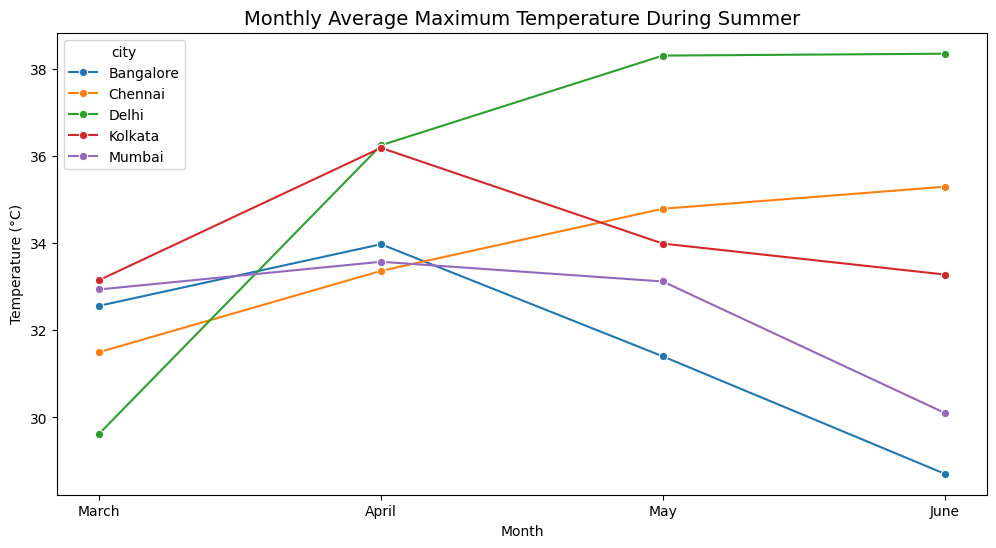

In [11]:
# Extract month names
all_data['month'] = all_data['date'].dt.strftime('%B')

# Filter summer data only
summer_monthly = all_data[all_data['season'] == 'Summer']

# Group by city + month for average max temperature
summer_monthly_avg = summer_monthly.groupby(['city', 'month'])['temp_max'].mean().reset_index()

# Ensure month order (March → June)
month_order = ["March", "April", "May", "June"]
summer_monthly_avg['month'] = pd.Categorical(summer_monthly_avg['month'], categories=month_order, ordered=True)

# Plot
plt.figure(figsize=(12,6))
sns.lineplot(
    data=summer_monthly_avg,
    x='month',
    y='temp_max',
    hue='city',
    marker='o'
)
plt.title("Monthly Average Maximum Temperature During Summer", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Temperature (°C)")
plt.show()


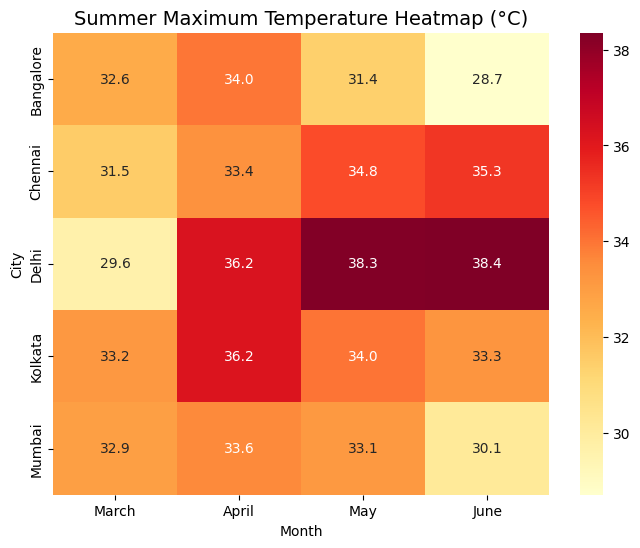

In [12]:
# Pivot for heatmap
heatmap_data = summer_monthly_avg.pivot(index="city", columns="month", values="temp_max")

plt.figure(figsize=(8,6))
sns.heatmap(heatmap_data, annot=True, cmap="YlOrRd", fmt=".1f")
plt.title("Summer Maximum Temperature Heatmap (°C)", fontsize=14)
plt.xlabel("Month")
plt.ylabel("City")
plt.show()

**Insights:**

- **Delhi** had the **highest average maximum temperature** in May and June, peaking at over 38°C. This reflects the intense heatwaves common in the northern plains during these months.

- **Bangalore** recorded the **lowest average maximum temperature** across all four months. Its temperature consistently decreased from April to June, dropping to around 29°C, which is typical of its temperate climate and pre-monsoon showers.

- **Kolkata** experienced a **significant temperature drop** from April to June, falling from 36.2°C to 33.2°C. This is likely due to the arrival of the monsoon season, which brings heavy rainfall and lowers the ambient temperature.

- **Chennai** showed a **steady increase** in average maximum temperature from March to June, peaking at around 35.2°C. This trend is consistent with the coastal city's hot and humid climate as it approaches the peak of summer.

### Monthly Average Minimum Temperature During Winter

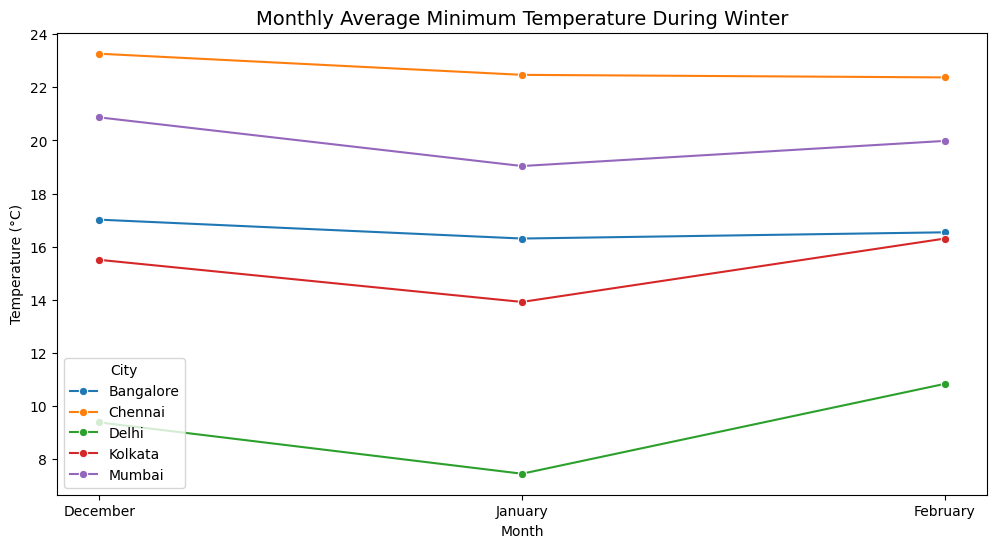

In [13]:
# Filter winter data
winter_monthly = all_data[all_data['season'] == 'Winter']

# Group by city + month for average min temperature
winter_monthly_avg = winter_monthly.groupby(['city', 'month'])['temp_min'].mean().reset_index()

# Ensure correct month order (December → February)
month_order_winter = ["December", "January", "February"]
winter_monthly_avg['month'] = pd.Categorical(winter_monthly_avg['month'], categories=month_order_winter, ordered=True)

# Plot line chart
plt.figure(figsize=(12,6))
sns.lineplot(
    data=winter_monthly_avg,
    x='month',
    y='temp_min',
    hue='city',
    marker='o'
)
plt.title("Monthly Average Minimum Temperature During Winter", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Temperature (°C)")
plt.legend(title="City")
plt.show()

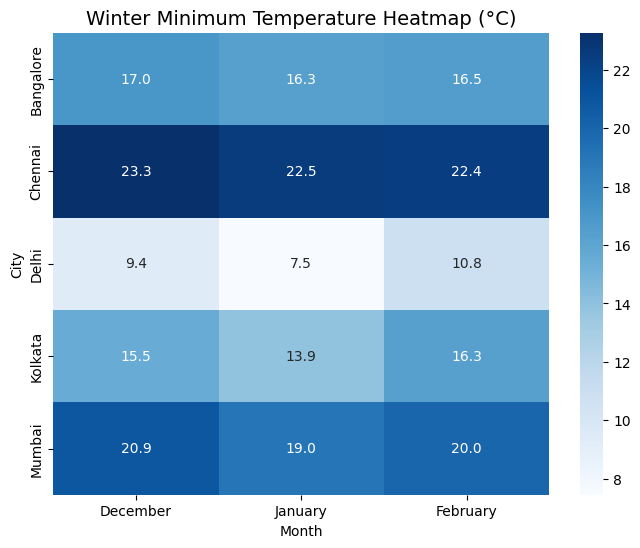

In [14]:
# Pivot for heatmap
heatmap_winter = winter_monthly_avg.pivot(index="city", columns="month", values="temp_min")

plt.figure(figsize=(8,6))
sns.heatmap(heatmap_winter, annot=True, cmap="Blues", fmt=".1f")
plt.title("Winter Minimum Temperature Heatmap (°C)", fontsize=14)
plt.xlabel("Month")
plt.ylabel("City")
plt.show()

**Insights:**

- **Delhi** had the **lowest average minimum temperature** during the winter months, dropping to about 7.5°C in January. This reflects the severe winter conditions and cold waves that affect the northern plains of India.

- **Chennai** consistently recorded the **highest average minimum temperature**, staying above 22°C throughout the winter. This is consistent with its tropical coastal climate, which experiences very mild winters.

- **Bangalore** and **Kolkata** showed similar temperature trends, with minimums in the range of **14°C to 17°C**. Both cities experienced a slight dip in January before temperatures rose again in February, a common winter pattern in their respective regions.

- **Mumbai** maintained a **stable and moderate minimum temperature**, ranging between 19°C and 21°C. Its coastal location helps moderate temperatures, preventing the extremes seen in northern cities. 🌡️

### Monthly Average Rainfall During Monsoon

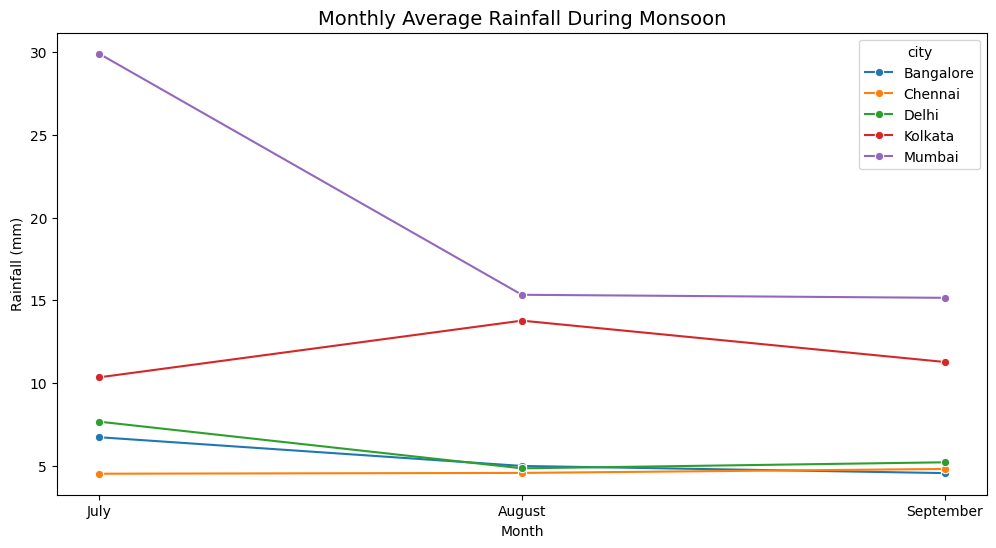

In [15]:
# Filter monsoon data
monsoon_monthly = all_data[all_data['season'] == 'Monsoon']

# Group by city + month for average rainfall
monsoon_monthly_avg = monsoon_monthly.groupby(['city', 'month'])['rain'].mean().reset_index()

# Ensure correct month order
month_order_monsoon = ["July", "August", "September"]
monsoon_monthly_avg['month'] = pd.Categorical(monsoon_monthly_avg['month'], categories=month_order_monsoon, ordered=True)

# Plot line chart
plt.figure(figsize=(12,6))
sns.lineplot(
    data=monsoon_monthly_avg,
    x='month',
    y='rain',
    hue='city',
    marker='o'
)
plt.title("Monthly Average Rainfall During Monsoon", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Rainfall (mm)")
plt.show()

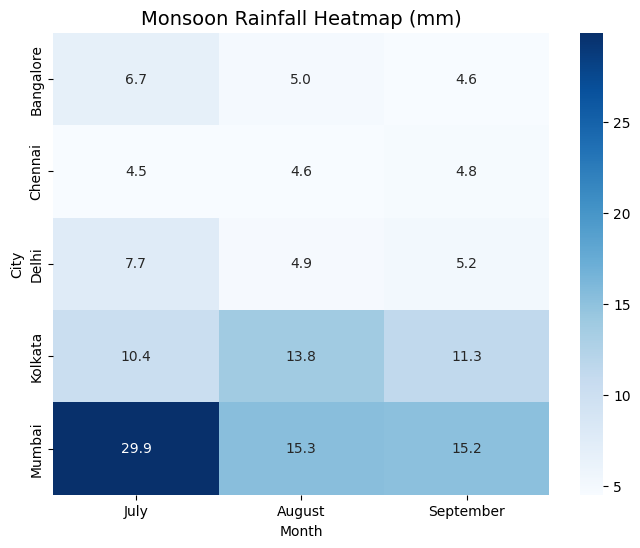

In [16]:
# Pivot for heatmap
heatmap_monsoon = monsoon_monthly_avg.pivot(index="city", columns="month", values="rain")

plt.figure(figsize=(8,6))
sns.heatmap(heatmap_monsoon, annot=True, cmap="Blues", fmt=".1f")
plt.title("Monsoon Rainfall Heatmap (mm)", fontsize=14)
plt.xlabel("Month")
plt.ylabel("City")
plt.show()

**Insights:**

- **Mumbai** recorded the **highest monsoon rainfall** (~30 mm), reflecting its heavy coastal precipitation at the start of the monsoon season, which then tapered off but remained high.

- **Kolkata** experienced **moderate rainfall** (~11-14 mm), with a peak in August before decreasing in September. This is consistent with its location in the Gangetic plains, which receives significant monsoon rains.

- **Bangalore and Chennai** recorded the **lowest rainfall** (~4-7 mm) throughout the monsoon period. This is expected as these cities are in a rain shadow region for the southwest monsoon, resulting in drier monsoon conditions compared to the west coast and northern cities.

- **Delhi** showed a decreasing trend in rainfall from July to September, with an overall moderate level (~5-8 mm). This pattern is typical as the monsoon trough shifts south, reducing rainfall intensity in northern India later in the season.

### Yearly Average Maximum Temperature (2020–2024)

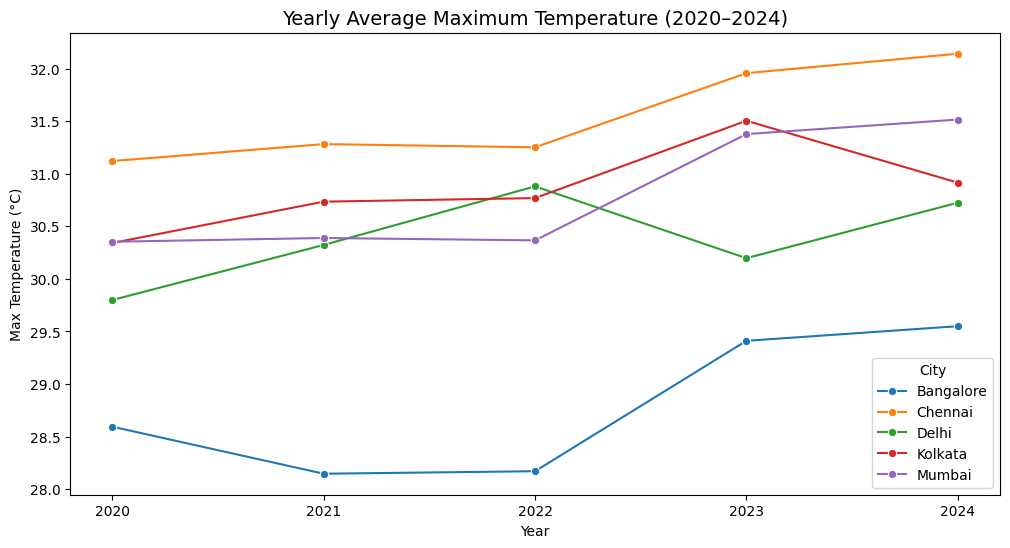

In [17]:
# Extract year from date
all_data['year'] = all_data['date'].dt.year

# Group by city + year for average maximum temperature
yearly_max_temp = all_data.groupby(['city', 'year'])['temp_max'].mean().reset_index()

# Plot line chart
yearly_max_temp['year'] = yearly_max_temp['year'].astype(str)

plt.figure(figsize=(12,6))
sns.lineplot(
    data=yearly_max_temp,
    x='year',
    y='temp_max',
    hue='city',
    marker='o'
)
plt.title("Yearly Average Maximum Temperature (2020–2024)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Max Temperature (°C)")
plt.legend(title="City")
plt.show()


**Insights:**

- **Chennai** consistently recorded the **highest average maximum temperature** from 2020 to 2024, peaking at over 32°C in 2024. Its tropical coastal location contributes to these persistently high temperatures.

- **Bangalore** consistently had the **lowest average maximum temperature**, remaining below 30°C for all five years. Its elevation helps moderate the climate, keeping temperatures much lower than in other major cities.

- **Kolkata** and **Mumbai** showed a **similar increasing trend** in average maximum temperature, particularly between 2022 and 2023. Kolkata's temperature peaked at ~31.5°C in 2023 before slightly decreasing, while Mumbai's temperature continued to rise. This could indicate the growing impact of urbanization and climate change in both cities.

- **Delhi** experienced a **notable fluctuation**, with a peak in 2022 (\~30.9°C) followed by a sharp drop in 2023 (\~30.2°C) and a slight increase in 2024. These variations are likely influenced by annual weather patterns, including the intensity of pre-monsoon heat and the timing of the monsoon season.

### Yearly Average Minimum Temperature in Winter (2020–2024)

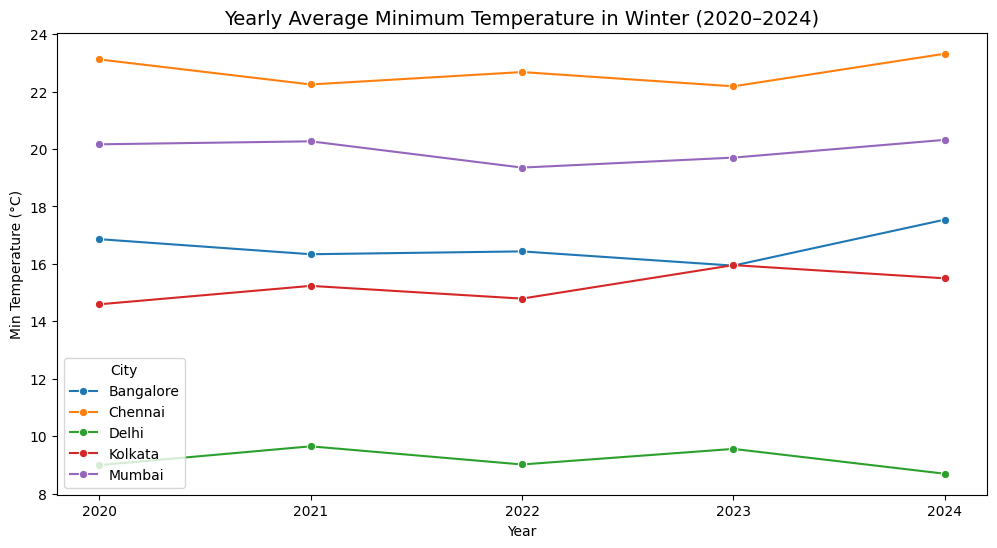

In [18]:
# Extract year
all_data['year'] = all_data['date'].dt.year

# Filter only Winter data
winter_data = all_data[all_data['season'] == 'Winter']

# Group by city + year for average minimum temperature
yearly_min_winter = winter_data.groupby(['city', 'year'])['temp_min'].mean().reset_index()

# Convert year to string (for clean axis labels)
yearly_min_winter['year'] = yearly_min_winter['year'].astype(str)

# Plot line chart
plt.figure(figsize=(12,6))
sns.lineplot(
    data=yearly_min_winter,
    x='year',
    y='temp_min',
    hue='city',
    marker='o'
)
plt.title("Yearly Average Minimum Temperature in Winter (2020–2024)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Min Temperature (°C)")
plt.legend(title="City")
plt.show()

**Insights:**

- **Chennai** consistently had the **highest average minimum temperature** during winter, staying above 22°C from 2020 to 2024. Its tropical coastal location keeps its winters very mild, without significant temperature drops.

- **Delhi** recorded the **lowest average minimum temperature**, fluctuating between 8.5°C and 9.7°C. This reflects the very cold winters in Northern India due to its distance from the moderating effect of the sea and cold winds from the Himalayas.

- **Mumbai** maintained a **stable and moderate minimum temperature** in winter, ranging from 19.4°C to 20.2°C. Its coastal location helps prevent extreme temperature variations, keeping the weather pleasant.

- **Bangalore and Kolkata** showed varying trends. **Bangalore**'s winter minimum temperature experienced a gradual decline before a significant increase in 2024, whereas **Kolkata**'s temperature showed a more erratic pattern, dipping in 2022 and rising sharply in 2023. This difference highlights the distinct regional climate patterns and how they respond to different meteorological factors.

### Yearly Average Rainfall in Monsoon (2020–2024)

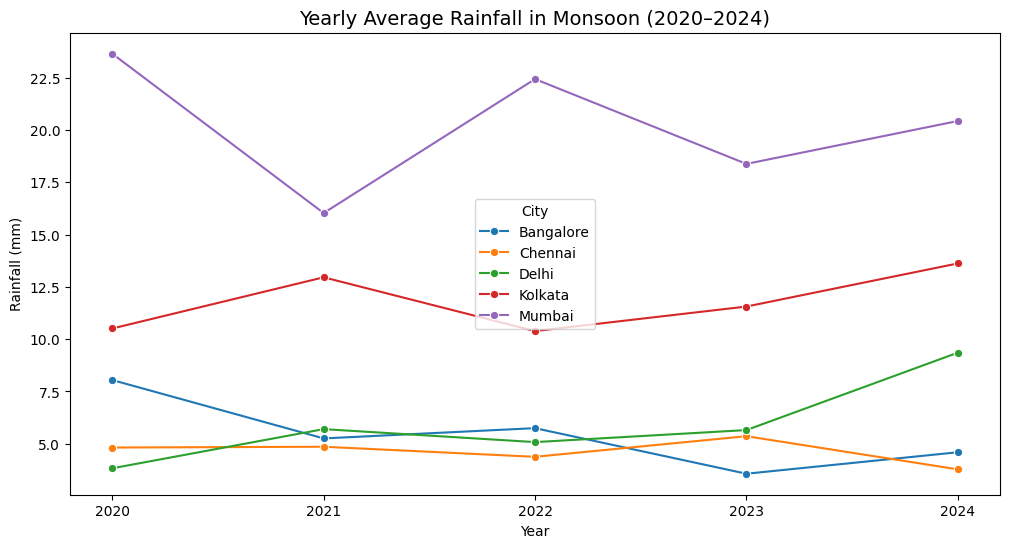

In [19]:
# Filter only Monsoon data
monsoon_data = all_data[all_data['season'] == 'Monsoon']

# Group by city + year for average rainfall
yearly_monsoon_rain = monsoon_data.groupby(['city', 'year'])['rain'].mean().reset_index()

# Convert year to string for clean x-axis labels
yearly_monsoon_rain['year'] = yearly_monsoon_rain['year'].astype(str)

# Plot line chart
plt.figure(figsize=(12,6))
sns.lineplot(
    data=yearly_monsoon_rain,
    x='year',
    y='rain',
    hue='city',
    marker='o'
)
plt.title("Yearly Average Rainfall in Monsoon (2020–2024)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Rainfall (mm)")
plt.legend(title="City")
plt.show()

**Insights:**

- **Mumbai** consistently recorded the **highest average monsoon rainfall** from 2020 to 2024, with levels well above 15 mm. The city's peak rainfall of ~22 mm in 2022 reflects its vulnerability to intense monsoon events and its heavy coastal precipitation.

- **Bangalore and Chennai** both had the **lowest average monsoon rainfall**, typically staying below 8 mm. Their rainfall patterns were relatively stable, which is consistent with their drier monsoon conditions compared to other major Indian cities.

- **Delhi** showed a **notable increase** in rainfall from 2020 to 2024, rising from ~4 mm to ~9.5 mm. This could be indicative of changing weather patterns and the increasing variability of the monsoon in northern India.

- **Kolkata** experienced a **significant drop** in rainfall from 2021 to 2022 before a gradual increase. Despite this fluctuation, its overall rainfall remained moderate throughout the period, consistent with its location and exposure to the Bay of Bengal branch of the monsoon.

### Seasonal Average Maximum Temperature Across Cities

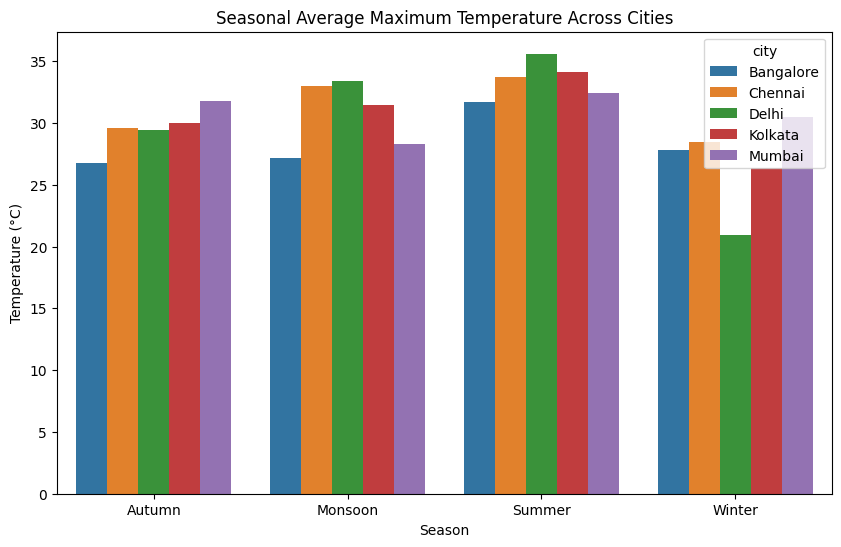

In [20]:
# Temperature comparison
plt.figure(figsize=(10, 6))
sns.barplot(data=seasonal_avg, x='season', y='temp_max', hue='city')
plt.title("Seasonal Average Maximum Temperature Across Cities")
plt.ylabel("Temperature (°C)")
plt.xlabel("Season")
plt.show()

**Insights:**

#### **Autumn**
- **Mumbai** recorded the **highest average maximum temperature** (~32°C). This is consistent with its tropical climate, where the post-monsoon period remains warm.
- **Bangalore** had the **lowest average maximum temperature** (~27°C) in autumn, reflecting its pleasant and mild climate even as temperatures elsewhere remain high.
- **Kolkata, Chennai, and Delhi** all had very similar average maximum temperatures in autumn, hovering around 29-30°C.


---


#### **Monsoon**
- **Delhi** and **Chennai** had the **highest average maximum temperatures** during the monsoon season, both above 33°C. This is due to the high humidity, which makes the air feel warmer despite the rainfall.

- **Bangalore** recorded the **lowest average maximum temperature** during the monsoon (~27°C). Its temperate climate is further cooled by monsoon showers.

- **Mumbai** and **Kolkata** experienced moderate temperatures (~28-31°C), with Mumbai being slightly cooler than Kolkata, likely due to more intense rainfall.


---


#### **Summer**
- **Delhi** and **Chennai** recorded the **highest average maximum temperatures** in the summer, both above 34°C. This is a result of intense heatwaves in Delhi and high humidity in Chennai.

- **Bangalore** once again had the **lowest average maximum temperature** (~32°C). Its mild climate prevents it from experiencing the extreme heat seen in other cities.

- **Kolkata** and **Mumbai** had similar maximum temperatures during the summer (~33-34°C), reflecting the hot and humid conditions in both coastal cities.


---


#### **Winter**
- **Chennai** had the **highest average maximum temperature** in winter (~28°C), indicating a very mild winter season with no significant drop in temperature.

- **Delhi** recorded the **lowest average maximum temperature** in winter (~21°C), a stark contrast to the other cities and a result of the cold waves that affect Northern India.

- **Kolkata** and **Mumbai** experienced moderate winter temperatures (~26-27°C), which is typical for coastal cities that do not get as cold as northern regions.

- **Bangalore**'s average maximum temperature was around 28°C in winter, similar to Chennai, highlighting its pleasant year-round climate.

### Seasonal Average Minimum Temperature Across Cities

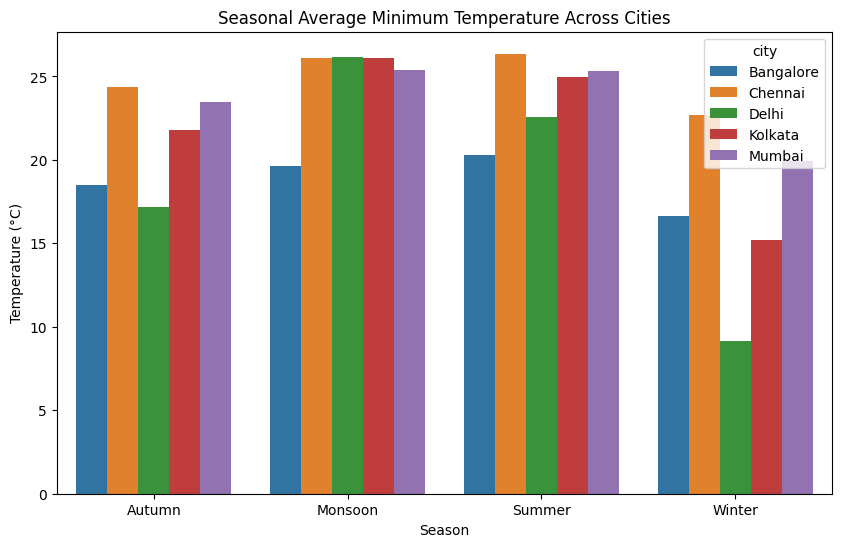

In [21]:
plt.figure(figsize=(10,6))
sns.barplot(data=seasonal_avg, x='season', y='temp_min', hue='city')
plt.title("Seasonal Average Minimum Temperature Across Cities")
plt.xlabel("Season")
plt.ylabel("Temperature (°C)")
plt.show()

**Insights:**

#### **Autumn**
- **Chennai** consistently recorded the **highest average minimum temperature** in autumn, staying at ~24.5°C. This highlights its tropical climate, where temperatures remain high even after the summer.

- **Delhi** had the **lowest average minimum temperature** (~17°C), indicating a significant drop from summer temperatures, a typical characteristic of northern Indian cities.

- **Bangalore, Kolkata, and Mumbai** all maintained moderate minimum temperatures, ranging from ~18°C to ~23°C.

---

#### **Monsoon**
- **All cities** recorded very similar and high average minimum temperatures during the monsoon season, ranging from ~20°C to ~26°C. This is due to the high humidity and cloud cover, which prevent significant nighttime cooling.

- **Kolkata** and **Chennai** had the **highest average minimum temperatures**, both at ~26°C. Their proximity to the coast and high humidity contribute to these warm nights.

- **Bangalore** and **Delhi** had slightly lower but still high minimum temperatures, indicating that even inland cities experience warm nights during this season. ☔

---

#### **Summer**
- **Chennai** once again recorded the **highest average minimum temperature** in summer, reaching ~26.5°C. This reflects its hot and humid climate where nights offer little relief from the heat.

- **Delhi** and **Bangalore** had the **lowest average minimum temperatures**, at ~23°C and ~20.5°C respectively, providing a bit more relief than coastal cities.

- **Kolkata** and **Mumbai** had similar minimum temperatures, both around 25°C, as their coastal locations keep nights warm and humid. 📈

---

#### **Winter**
- **Delhi** recorded the **lowest average minimum temperature** at ~9°C. This is a significant drop and reflects the cold waves that affect Northern India during the winter.

- **Chennai** had the **highest average minimum temperature** in winter (~23°C), indicating its mild climate and lack of a significant cold season.

- **Kolkata, Bangalore, and Mumbai** all had moderate minimum temperatures, ranging from ~15°C to ~20°C. Bangalore and Mumbai's temperatures were very similar, while Kolkata was slightly cooler.

### Seasonal Average Rainfall Across Cities

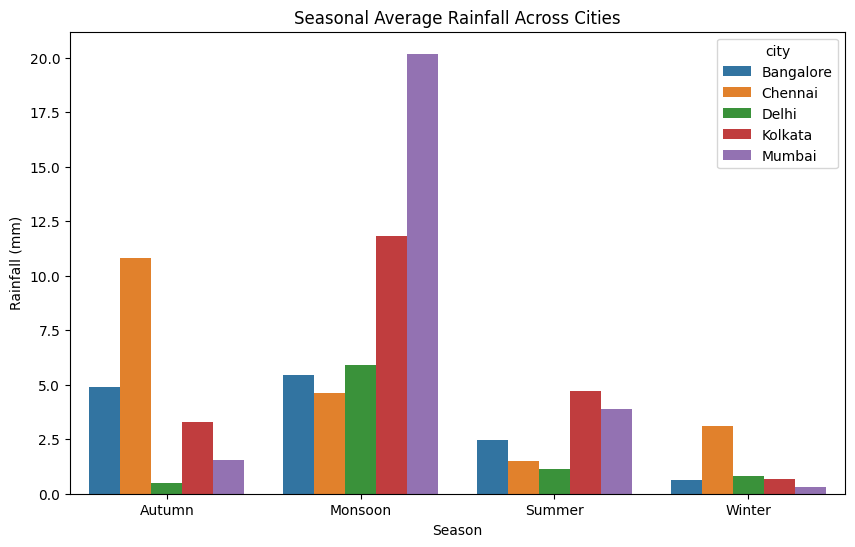

In [22]:
# Rainfall comparison
plt.figure(figsize=(10,6))
sns.barplot(data=seasonal_avg, x='season', y='rain', hue='city')
plt.title("Seasonal Average Rainfall Across Cities")
plt.xlabel("Season")
plt.ylabel("Rainfall (mm)")
plt.show()

**Insights**

#### **Autumn**
- **Chennai** recorded the **highest average rainfall** in autumn (~11 mm), a direct result of its location and the northeast monsoon which brings significant rainfall to the state during this season.

- **Bangalore** also received a notable amount of rainfall (~5 mm), while **Delhi** and **Mumbai** had very low rainfall, both below 2 mm.

- **Kolkata** received moderate rainfall (~3.5 mm), indicating the withdrawal of the monsoon.

---

#### **Monsoon**
- **Mumbai** had the **highest average rainfall** in the monsoon season, peaking at ~20 mm. This reflects the city's heavy precipitation from the southwest monsoon due to its coastal location.

- **Kolkata** and **Delhi** experienced moderate rainfall, with Kolkata receiving ~12 mm and Delhi ~6 mm. This indicates a strong monsoon in eastern India and a moderate one in northern India.

- **Bangalore** and **Chennai** recorded the **lowest rainfall** during the monsoon season, both below 6 mm, consistent with their drier monsoon conditions.

---

#### **Summer**
- **Kolkata** and **Mumbai** had the **highest average rainfall** during the summer, at ~4.8 mm and ~4 mm respectively. This is likely due to pre-monsoon showers and thunderstorms that are common in these coastal and eastern regions.

- **Delhi** and **Bangalore** had very low rainfall, both below 3 mm. These regions are very dry during the summer months before the arrival of the monsoon.

- **Chennai** also had very low summer rainfall, around 2 mm.

---

#### **Winter**
- All cities recorded **very low average rainfall** in winter, with most below 2 mm. This is the driest season for most of the cities on the chart.

- **Chennai** had the **highest winter rainfall** (~3.2 mm) compared to the other cities, which is a result of the retreating northeast monsoon that can bring some rain during this period.

- **Bangalore, Delhi, Kolkata, and Mumbai** all had minimal rainfall, below 1.5 mm, reflecting the clear, dry weather typical of winter in these regions.

### Seasonal Average Humidity Across Cities

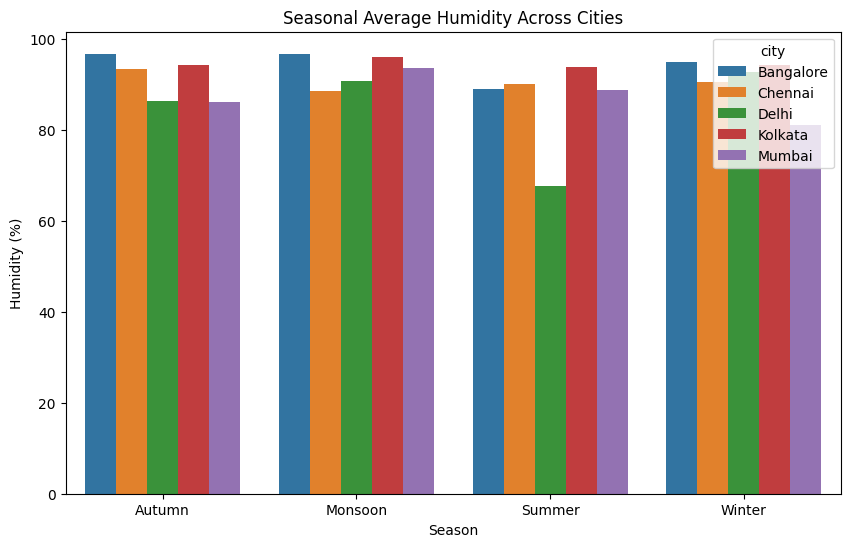

In [23]:
# Humidity comparison
plt.figure(figsize=(10,6))
sns.barplot(data=seasonal_avg, x='season', y='humidity', hue='city')
plt.title("Seasonal Average Humidity Across Cities")
plt.xlabel("Season")
plt.ylabel("Humidity (%)")
plt.show()

**Insights**

#### **Autumn**
- **Bangalore** recorded the **highest average humidity** in autumn, at around 97%. This is likely due to the post-monsoon climate, where the air remains very moist.

- **Delhi** had the **lowest average humidity** (~86%), which is expected as the weather turns drier after the monsoon season ends.

- **Kolkata, Chennai, and Mumbai** all maintained a very high humidity level (above 90%), reflecting their coastal and tropical locations.

---

#### **Monsoon**
- All cities experienced **very high humidity** during the monsoon season, with all cities at 87% or higher. This is a direct result of the heavy rainfall and evaporation from the ground.

- **Bangalore** and **Kolkata** both recorded the **highest average humidity** in the monsoon season, at around 97%.

- **Delhi** and **Mumbai** also had extremely high humidity levels, both above 90%, highlighting the widespread impact of the monsoon on air moisture.

---

#### **Summer**
- **Kolkata** recorded the **highest average humidity** in the summer (~95%). This is consistent with its hot and humid climate due to its coastal location.

- **Delhi** had the **lowest average humidity** by a significant margin (~68%). This is typical for a landlocked city that experiences dry heat and very low humidity before the monsoon arrives.

- **Bangalore, Chennai, and Mumbai** all had high humidity levels, ranging from 88% to 90%, reflecting their proximity to water bodies and the build-up of moisture.


---

#### **Winter**
- **Bangalore** had the **highest average humidity** in winter (~96%). Despite cooler temperatures, the air remains moist in the post-monsoon period.

- **Delhi** again had the **lowest average humidity** (~70%), which is a characteristic of its cold and dry winter.

- **Kolkata, Chennai, and Mumbai** all maintained very high humidity levels (89% or higher), indicating that coastal cities remain humid even during the winter months.

### Relationship Between Humidity and Rainfall During Monsoon (Jul–Sep) Across Cities

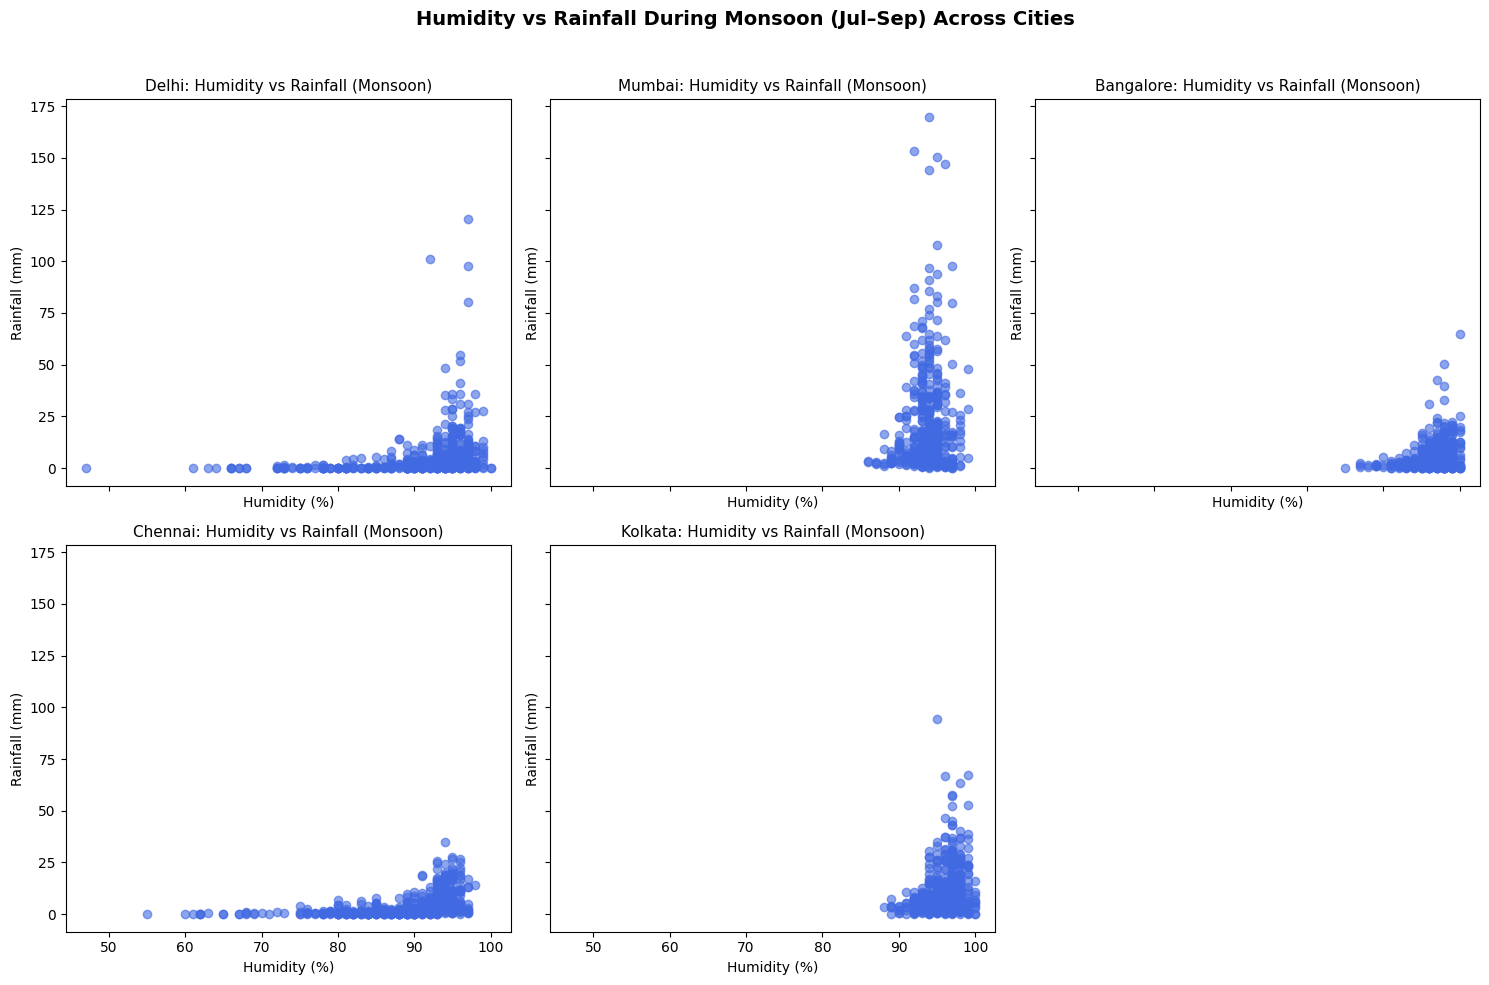

In [ ]:
# Filter only Monsoon data
monsoon_data = all_data[all_data['season'] == 'Monsoon']

# Unique cities
cities = monsoon_data['city'].unique()

# Subplots - one per city
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10), sharex=True, sharey=True)
axes = axes.flatten()

for i, city in enumerate(cities):
    city_data = monsoon_data[monsoon_data['city'] == city]

    axes[i].scatter(city_data['humidity'], city_data['rain'], alpha=0.6, c='royalblue')
    axes[i].set_title(f"{city}: Humidity vs Rainfall (Monsoon)", fontsize=11)
    axes[i].set_xlabel("Humidity (%)")
    axes[i].set_ylabel("Rainfall (mm)")

# Remove empty subplots if number of cities < grid slots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Humidity vs Rainfall During Monsoon (Jul–Sep) Across Cities", fontsize=14, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


## 🔎 Summary of Insights
- **Delhi** shows the most extreme seasonal variation, with scorching summers (highest maximum temperatures) and cold winters (lowest minimum temperatures).  
- **Chennai** remains consistently warm, with high minimum winter temperatures and relatively high summer peaks.  
- **Mumbai** has a stable coastal climate — moderate in both summer and winter — with high rainfall during monsoon.  
- **Bangalore** maintains mild conditions year-round, with neither extreme heat nor cold, reflecting its plateau climate.  
- **Kolkata** lies between extremes, showing moderately high summer temperatures, warm winters, and significant monsoon rainfall.  
- **Humidity–Rainfall Relationship**: Cities with higher monsoon rainfall (e.g., Mumbai, Kolkata) also show higher humidity levels, confirming the expected correlation.  

---

## ✅ Conclusion
This analysis highlights the diversity of Indian urban climates.  
- **Delhi** faces the sharpest contrast across seasons, demanding careful planning for heating and cooling needs.  
- **Chennai and Mumbai** maintain warmer, more stable climates, making them less prone to seasonal extremes but more affected by humidity and rainfall.  
- **Bangalore** stands out for its consistently pleasant weather, aligning with its reputation as a livable IT hub.  

Overall, these climatic patterns have implications for **energy demand, urban planning, tourism strategies, and quality of life** in each city.  


---

## ⚠️ Limitations
- The analysis is restricted to **five Indian metro cities**; including more cities would provide a broader national perspective.  
- The dataset spans **only 2020–2024**, which may not fully capture long-term climate trends or anomalies.  
- Daily averages smooth out **extreme events** (e.g., record-breaking heatwaves or flash floods), limiting the granularity of insights.  
- Other important weather parameters such as **wind speed, air quality, and cloud cover** were not included but could add depth to the analysis.  

---

## 🔮 Future Scope
- **Extended Time Horizon**: Expanding the dataset to 10–20 years could reveal more meaningful climate trends.  
- **Geographic Expansion**: Including Tier-2 and Tier-3 cities would highlight regional differences beyond metro areas.  
- **Parameter Enrichment**: Incorporating factors like humidity, air quality, and wind speed could enable multi-dimensional analysis.  
- **Applied Analysis**: Linking weather trends with **energy demand, agriculture productivity, or health indicators** could provide actionable insights.  
- **Predictive Modeling**: Future work can explore **seasonal forecasting and climate projections** using statistical or machine learning methods.  
